In [528]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import coremltools

In [76]:
df = pd.read_csv('{}/new_data/train.csv'.format(os.getcwd()))
columns = ['id_code', 'diagnosis']

In [77]:
df['id_code']

0       000c1434d8d7
1       001639a390f0
2       0024cdab0c1e
3       002c21358ce6
4       005b95c28852
5       0083ee8054ee
6       0097f532ac9f
7       00a8624548a9
8       00b74780d31d
9       00cb6555d108
10      00cc2b75cddd
11      00e4ddff966a
12      00f6c1be5a33
13      0104b032c141
14      0124dffecf29
15      0125fbd2e791
16      012a242ac6ff
17      014508ccb9cb
18      0151781fe50b
19      0161338f53cc
20      0180bfa26c0b
21      0182152c50de
22      01b3aed3ed4c
23      01c7808d901d
24      01d9477b1171
25      01eb826f6467
26      01f7bb8be950
27      0212dd31f623
28      022f820027b8
29      0231642cf1c2
            ...     
3632    fe06dad6851c
3633    fe0e2dee1834
3634    fe0fc67c7980
3635    fe2df69676cf
3636    fe37f4492920
3637    fe3b0e50be78
3638    fe3f62695b2d
3639    fe674c2f73f5
3640    fea14b3d44b0
3641    febfb20dc311
3642    fecf4c5ae84b
3643    fed5bb685832
3644    fefded6bf135
3645    ff03f74667df
3646    ff0740cb484a
3647    ff1e940105f9
3648    ff344

In [78]:
# train_slice = columns[0:250]
# test_slice = columns[0:250]

def append_text(fn):
    return fn+".png"

df['diagnosis'] = df['diagnosis'].astype('str')
df["id_code"] = df["id_code"].apply(append_text)


In [162]:
train_df = df[0:3000]
test_df = df[3000:3662]
train_df.head()
print(len(train_df['id_code']))
print(len(test_df['diagnosis']))

3000
662


In [537]:
%run DataGenerator.ipynb

base_path = '/media/hdd2/MykhailoMelnychuk/eye/Diabetic_Retinopathy_Detection/new_data/'
generator = DataGenerator(base_dataset_path=base_path, is_validation = False)


test_generator = DataGenerator(base_dataset_path=base_path, is_validation = True)

In [538]:
image, label = generator[0]

[0. 0. 1. 0. 0.]
(224, 224, 3)


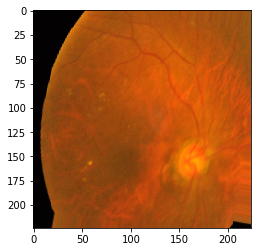

In [539]:
index = 0

print(label[index])
print(image[0].shape)
plt.imshow(image[5])

In [540]:
from keras.applications import MobileNetV2
from keras.applications.densenet import DenseNet121



# base_model = DenseNet121(include_top=False,
#                              weights='imagenet',
#                              input_shape=[500, 800, 3])


base_model = MobileNetV2(include_top=False,
                             weights='imagenet',
                             input_shape=[224, 224, 3])

In [541]:
from keras.layers import Dense, Input, GlobalAveragePooling2D
from keras.models import Model
from keras.models import Model


for layer in base_model.layers:
#     if layer.name.startswith("block_4"):
#         break

    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x) 
preds = Dense(5, activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=preds)

In [542]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [543]:
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_23[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
___________________________________________________________________________________________

In [544]:
model.fit_generator(generator,
                    validation_data=test_generator,
                    epochs=450,
                    steps_per_epoch=len(generator),
                    validation_steps=len(test_generator),
                    use_multiprocessing=True,
                    workers=6)

Epoch 1/450
279/279 [==============================] - 273s 979ms/step - loss: 0.7876 - acc: 0.7148 - val_loss: 0.9891 - val_acc: 0.6733
Epoch 2/450
279/279 [==============================] - 186s 668ms/step - loss: 0.5806 - acc: 0.7781 - val_loss: 0.9859 - val_acc: 0.7267
Epoch 3/450
279/279 [==============================] - 139s 499ms/step - loss: 0.5194 - acc: 0.8124 - val_loss: 0.7713 - val_acc: 0.7867
Epoch 4/450
279/279 [==============================] - 120s 431ms/step - loss: 0.4840 - acc: 0.8142 - val_loss: 1.1228 - val_acc: 0.7533
Epoch 5/450
279/279 [==============================] - 130s 465ms/step - loss: 0.4264 - acc: 0.8459 - val_loss: 0.6684 - val_acc: 0.7533
Epoch 6/450
  1/279 [..............................] - ETA: 1:08 - loss: 0.3376 - acc: 0.9167

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.575999). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


279/279 [==============================] - 134s 479ms/step - loss: 0.3864 - acc: 0.8519 - val_loss: 0.6407 - val_acc: 0.7967
Epoch 7/450
279/279 [==============================] - 144s 516ms/step - loss: 0.3491 - acc: 0.8707 - val_loss: 0.6059 - val_acc: 0.8200
Epoch 8/450
279/279 [==============================] - 154s 552ms/step - loss: 0.3153 - acc: 0.8781 - val_loss: 0.8358 - val_acc: 0.8033
Epoch 9/450
279/279 [==============================] - 158s 568ms/step - loss: 0.2902 - acc: 0.8952 - val_loss: 1.0486 - val_acc: 0.7900
Epoch 10/450
279/279 [==============================] - 159s 571ms/step - loss: 0.2606 - acc: 0.8996 - val_loss: 1.1748 - val_acc: 0.7867
Epoch 11/450
279/279 [==============================] - 156s 561ms/step - loss: 0.2382 - acc: 0.9125 - val_loss: 0.9192 - val_acc: 0.7933
Epoch 12/450
279/279 [==============================] - 163s 583ms/step - loss: 0.2283 - acc: 0.9167 - val_loss: 1.1867 - val_acc: 0.7933
Epoch 13/450
279/279 [============================

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.376043). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


279/279 [==============================] - 193s 693ms/step - loss: 0.0982 - acc: 0.9654 - val_loss: 1.0579 - val_acc: 0.7900
Epoch 30/450
279/279 [==============================] - 190s 682ms/step - loss: 0.0959 - acc: 0.9668 - val_loss: 1.6127 - val_acc: 0.6833
Epoch 31/450
279/279 [==============================] - 189s 678ms/step - loss: 0.0901 - acc: 0.9654 - val_loss: 1.1058 - val_acc: 0.8167
Epoch 32/450
279/279 [==============================] - 197s 706ms/step - loss: 0.1007 - acc: 0.9609 - val_loss: 0.9635 - val_acc: 0.8267
Epoch 33/450
279/279 [==============================] - 193s 691ms/step - loss: 0.1166 - acc: 0.9624 - val_loss: 0.8503 - val_acc: 0.8033
Epoch 34/450
279/279 [==============================] - 193s 690ms/step - loss: 0.0917 - acc: 0.9668 - val_loss: 0.8692 - val_acc: 0.8067
Epoch 35/450
279/279 [==============================] - 188s 674ms/step - loss: 0.0673 - acc: 0.9734 - val_loss: 1.1450 - val_acc: 0.8067
Epoch 36/450
279/279 [=========================

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.327152). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


279/279 [==============================] - 185s 664ms/step - loss: 0.0388 - acc: 0.9815 - val_loss: 1.4509 - val_acc: 0.8167
Epoch 60/450
279/279 [==============================] - 184s 661ms/step - loss: 0.0742 - acc: 0.9746 - val_loss: 1.3719 - val_acc: 0.8133
Epoch 61/450
279/279 [==============================] - 185s 664ms/step - loss: 0.0582 - acc: 0.9758 - val_loss: 1.4082 - val_acc: 0.8000
Epoch 62/450
279/279 [==============================] - 184s 660ms/step - loss: 0.0644 - acc: 0.9743 - val_loss: 1.1784 - val_acc: 0.7867
Epoch 63/450
279/279 [==============================] - 184s 660ms/step - loss: 0.0588 - acc: 0.9776 - val_loss: 1.1546 - val_acc: 0.7767
Epoch 64/450
279/279 [==============================] - 186s 666ms/step - loss: 0.0559 - acc: 0.9773 - val_loss: 1.4483 - val_acc: 0.8200
Epoch 65/450
279/279 [==============================] - 187s 670ms/step - loss: 0.0599 - acc: 0.9755 - val_loss: 1.5885 - val_acc: 0.8167
Epoch 66/450
279/279 [=========================

Process ForkPoolWorker-5977:
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Process ForkPoolWorker-5980:
Process ForkPoolWorker-5978:
Process ForkPoolWorker-5979:
Process ForkPoolWorker-5981:
Process ForkPoolWorker-5982:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


KeyboardInterrupt: 

Process ForkPoolWorker-5975:
Process ForkPoolWorker-5972:
Traceback (most recent call last):
Process ForkPoolWorker-5974:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
Process ForkPoolWorker-5976:
Process ForkPoolWorker-597

In [523]:
model.save_weights('mn0.86model.h5')

In [524]:
w_path = '/media/hdd2/MykhailoMelnychuk/eye/Diabetic_Retinopathy_Detection/mn0.86model.h5'
model.load_weights(w_path)

In [530]:
output_labels = ['0', '1', '2', '3', '4']


scale = 1./255.

args = dict(
    image_scale = scale
)

your_model = coremltools.converters.keras.convert(model, image_input_names=['input1'], image_scale=scale)
your_model.save('mn086model.mlmodel')

# your_model.save('model.mlmodel')

0 : input_22, <keras.engine.input_layer.InputLayer object at 0x7f7d2ef3c198>
1 : Conv1_pad, <keras.layers.convolutional.ZeroPadding2D object at 0x7f7d2eecc6d8>
2 : Conv1, <keras.layers.convolutional.Conv2D object at 0x7f7d2eecc6a0>
3 : bn_Conv1, <keras.layers.normalization.BatchNormalization object at 0x7f7d2eecc240>
4 : Conv1_relu, <keras.layers.advanced_activations.ReLU object at 0x7f7d2ef01f28>
5 : expanded_conv_depthwise, <keras.layers.convolutional.DepthwiseConv2D object at 0x7f7d2eede9e8>
6 : expanded_conv_depthwise_BN, <keras.layers.normalization.BatchNormalization object at 0x7f7d2eedee10>
7 : expanded_conv_depthwise_relu, <keras.layers.advanced_activations.ReLU object at 0x7f7d2ed06eb8>
8 : expanded_conv_project, <keras.layers.convolutional.Conv2D object at 0x7f7d2ec92630>
9 : expanded_conv_project_BN, <keras.layers.normalization.BatchNormalization object at 0x7f7d2ec5fb00>
10 : block_1_expand, <keras.layers.convolutional.Conv2D object at 0x7f7cecc4c898>
11 : block_1_expand_BN

95 : block_10_depthwise_BN, <keras.layers.normalization.BatchNormalization object at 0x7f7ceb6a39e8>
96 : block_10_depthwise_relu, <keras.layers.advanced_activations.ReLU object at 0x7f7ceb6155c0>
97 : block_10_project, <keras.layers.convolutional.Conv2D object at 0x7f7ceb5d8c18>
98 : block_10_project_BN, <keras.layers.normalization.BatchNormalization object at 0x7f7ceb5501d0>
99 : block_11_expand, <keras.layers.convolutional.Conv2D object at 0x7f7ceb518a90>
100 : block_11_expand_BN, <keras.layers.normalization.BatchNormalization object at 0x7f7ceb4ed7f0>
101 : block_11_expand_relu, <keras.layers.advanced_activations.ReLU object at 0x7f7ceb4aa320>
102 : block_11_depthwise, <keras.layers.convolutional.DepthwiseConv2D object at 0x7f7ceb3fbd68>
103 : block_11_depthwise_BN, <keras.layers.normalization.BatchNormalization object at 0x7f7ceb3fb978>
104 : block_11_depthwise_relu, <keras.layers.advanced_activations.ReLU object at 0x7f7ceb3ec5f8>
105 : block_11_project, <keras.layers.convolution

In [19]:
model_json = model.to_json()
open('architecture.json', 'w').write(model_json)
model.save_weights('weights.h5', overwrite=True)

In [ ]:
import numpy as np
np.array([1, 2, 3]).std()
# np.std([1, 2, 3])


In [ ]:
np.std([1, 2, 3])


In [71]:
# ffd97f8cd5aa,0
# ffec9a18a3ce,2
# ff8a0b45c789,4

import cv2
import numpy as np

image_name = '0fb1053285cf'
image = cv2.imread('/media/hdd2/MykhailoMelnychuk/eye/Diabetic_Retinopathy_Detection/new_data/train_images/{}.png'.format(image_name))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = image / 255
image = cv2.resize(image, (250, 250))
preds = model.predict(np.array([image]))
print(np.argmax(preds))
print(preds)

1
[[1.4146707e-06 9.9999511e-01 3.3338888e-06 1.5638030e-09 1.1454063e-07]]


In [144]:
%run DataGenerator.ipynb

base_path = '/media/hdd2/MykhailoMelnychuk/eye/Diabetic_Retinopathy_Detection/new_data/'
generator = DataGenerator(base_dataset_path=base_path, is_validation = False)
images, labels = generator[0]

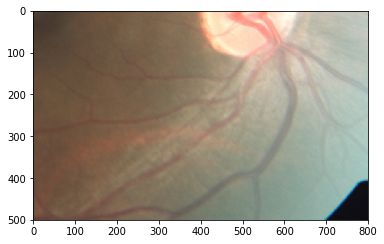

In [145]:
plt.imshow(images[3])